<img style = "float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width = "300" height = "500" /> 
    
    
### <font color = 'navy'> Simulación de procesos financieros. 

**Nombres:** Lyha Espinosa García y Miriam Eunice Rosas Medellín.

**Fecha:** 8 de marzo del 2021.

**Expediente** : 721861 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5: Clase 9
**Link al repositorio en Github**: https://github.com/Miriam1999/Tarea5_LEspinosa_MERosas

## Ejercicio 1

Para las siguientes dos funciones, genere 1000 muestras aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma, compárela con la función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)**, [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este proceso se realiza con el fin de validar que el procedimiento y los resultados son correctos.
    
**Generación de una variable aleatoria continua.** El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1) tiene una distribución:
$$F(x) = \frac{2}{\pi} \sin^{-1} (\sqrt x), \quad 0 \leq x < 1$$ </font>

### Solución de Lyha

#### Markdown

1. Función inversa: $$x = \sin^{2} (\frac{U\pi}{2}) $$  
2. Función de densidad $f(x)$ : 
$$\frac{dF(X)}{dx}=f(x) = \frac{1}{\pi \sqrt{1-x} \sqrt x}$$

#### Código

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")
%matplotlib inline

def mov_brown(N: 'Numero de muestras'):
    '''
    Esta función retorna la transformada inversa de la distribución dada
    '''
    return (np.sin((np.random.random(N)*np.pi)/2))**2

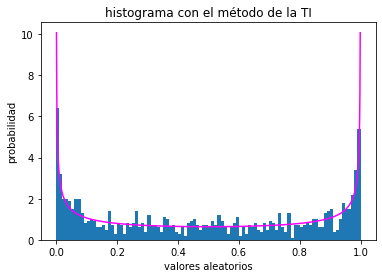

In [4]:
N = 1000 # numero de muestras 
x = mov_brown(N) # función transformada inversa de la función de distribución
plt.hist(x,100,density=True) #histograma de la TI
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma con el método de la TI')

# funcion de densidad f(x) 
f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
a = np.arange(0, 1, 1/N) # generar N valores entre 0 y 1
density = f(a) # evaluar función de densidad en los valores
plt.plot(a, density, label='f(x)', color = 'magenta') #graficar función de densidad 
plt.show()

### Solución de Miriam

#### Markdown

**Pasos a seguir para obtener la transformada inversa**:
1. Obtener función inversa asumiendo que $F(x)$ (función de distribución o de probabilidad acumulada) es uniforme continua:
$$F(x) = \frac{2}{\pi}\sin^{-1} (\sqrt x) = U$$
$$2\sin^{-1} (\sqrt x) = U\pi$$
$$\sin^{-1} (\sqrt x) = \frac{U\pi}{2}$$
$$\sqrt x = \sin(\frac{U\pi}{2})$$
$$x = \sin^{2} (\frac{U\pi}{2}) = F_{inv}$$


2. Obtener función de densidad $f(x)$ (probabilidad) a partir de la función de distribución -probabilidad acumulada- (con la regla de la cadena):
$$\frac{dF(x)}{d(x)} = f(x)$$
$$f(x) = \frac{d}{dx} (\frac{2}{\pi} \sin^{-1} \sqrt x )$$
$$f(x) = \frac{2}{\pi} \cdot \frac{1}{\sqrt{1-\sqrt {x}^2}} \cdot \frac{1}{2\sqrt x}$$
$$f(x) = \frac{1}{\pi \sqrt{1-x} \sqrt x}$$

#### Código

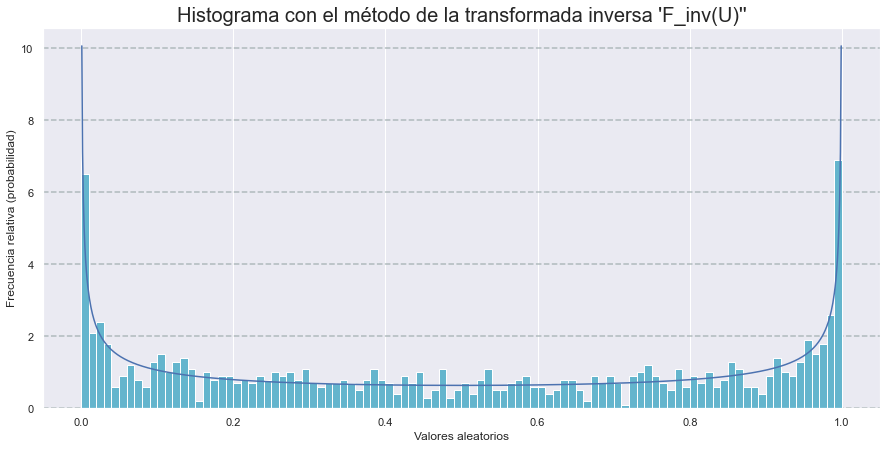

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
np.random.seed(123) # semilla
def comparacion_finv_x(f: "función de densidad 'f(x)'", F_inv: "transformada inversa de la función de distribución 'F(x)'", 
                       N: "número de muestras"):
    """Esta función compara la función de densidad (probabilidad) evaluada en x 'f(x)' con la transformada inversa de la función
    de distribución (probabilidad acumulada) evaluada en números aleatorios uniforme y continuamente distribuidos"""
    u = np.random.rand(N) # generar las muestras aleatorias, continuas e uniformemente distribuidas U
    f_random = F_inv(u) # evaluar la transformada en los valores aleatorios
    x = np.arange(0, 1, (1 / N)) # generar N valores en x
    f_densidad = f(x) # evaluar la función de densidad en los valores de x f(x)
    plt.figure(figsize = (15, 7)) # histograma
    plt.hist(f_random, bins = 100, color = "c", density = True)
    plt.plot(x, f_densidad)
    plt.xlabel("Valores aleatorios", fontsize = 12)
    plt.ylabel("Frecuencia relativa (probabilidad)", fontsize = 12)
    plt.title("Histograma con el método de la transformada inversa 'F_inv(U)''", fontsize = 20)
    plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
    plt.show() 
f = lambda x : 1 / (np.pi * (1 - x)**(1 / 2) * (x)**(1 / 2)) # función de densidad (probabilidad) encontrada
F_inv = lambda u : np.sin((np.pi * u) / 2)**2 # transformada inversa de la función de distribución (probabilidad acumulada)
N = 1000 # número de muestras
comparacion_finv_x(f, F_inv, N)

## Ejercicio 2

**Generación de una variable aleatoria discreta**. La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad $p$ de éxito en cada ensayo. Generar una variable aletoria binomial con parámetros $n = 10$ y $p = 0.7$. Recordar que 
$$X\sim binomial(n, p) \longrightarrow p_i = P(X = i) = \frac{n!}{i!(n - i)!} p^i(1 - p)^{n - i}, \quad i = 0, 1, \cdots, n$$

Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:

$$p_{i + 1} = \frac{n - i}{i + 1} \frac{p}{1 - p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x) = \operatorname{P} (X \leq x) = \sum _{x_{i} \leq x} \operatorname{P} (X = x_{i}) = \sum _{x_{i} \leq x} p(x_{i})$, corresponde a su CDF.

### Solución de Lyha

#### El código se genero de la siguiente manera: 

- Mediante la fórmula dada:  
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$
se genera una función para calcular la probabilidad acumulada
- Se genera una distribución en base a esa probabilidad acumulada, y en base a valores reales aleatorios. 
- Para concluir se grafica el histograma de esta distribución binomial 

#### Código

In [5]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)

    plt.legend()
    plt.show()

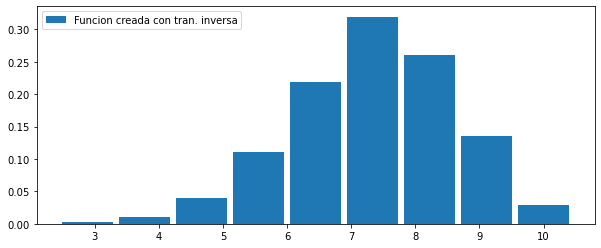

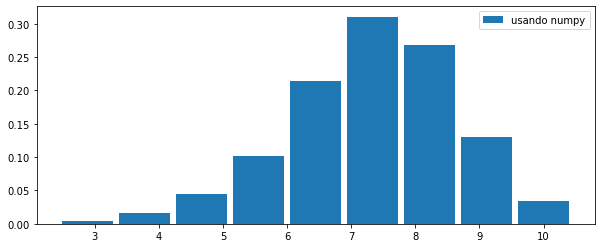

In [11]:
def Proba_acum_Binomial(n: 'parámetro n de la distribución binomial',
                      p: 'parámetro p de la distribución binomial'):
    '''
    Función que calcula la probabilidad acumulada
    '''
    proba = np.zeros(n) # vector de n ceros 
    proba[0] = (1-p)**n # primer elemento del vector
    def vector(i):
        nonlocal proba
        proba[i+1]=((p/(1-p))*(n-i)/(i+1))*proba[i]
          
    [vector(i) for i in range(n-1)] # Llenar vector 
    return np.cumsum(proba) #retornar la suma acumulada

n, p, N = 10, 0.7, 1000
p_acum = Proba_acum_Binomial(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'Funcion creada con tran. inversa')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

Al comparar 

### Solución de Miriam

#### Markdown

**El siguiente código se genera usando la lógica que sigue**:
1. Para llenar el primer elemento de la distribución (el vector de las probabilidades), es necesario sustituir $i = 0$ en la fórmula de $p_i$:
$$p_0 = P(X = 0) = \frac{n!}{0!(n - 0)!} p^0(1 - p)^{n - 0} = \frac{n!}{0! \cdot n!} (1 - p)^{n} = \frac{1}{0!} (1 - p)^{n} = \frac{1}{1} (1 - p)^{n} = 1 \cdot (1 - p)^{n} = (1 - p)^{n}$$

2. Para llenar los demás elementos, basta con seguir la fórmula ya dada:
$$p_{i + 1} = \frac{n - i}{i + 1} \frac{p}{1 - p} p_i$$

3. Después se genera la distribución aleatoria en base a esas probabilidades, calculando la frecuencia acumulada de cada una de las $x$. 

4. Finalmente se comparan dos histogramas: uno usando la distribución binomial generada en el procedimiento previo, y otro usando una distribución binomial generada con `numpy.random.binomial()`.

#### Código

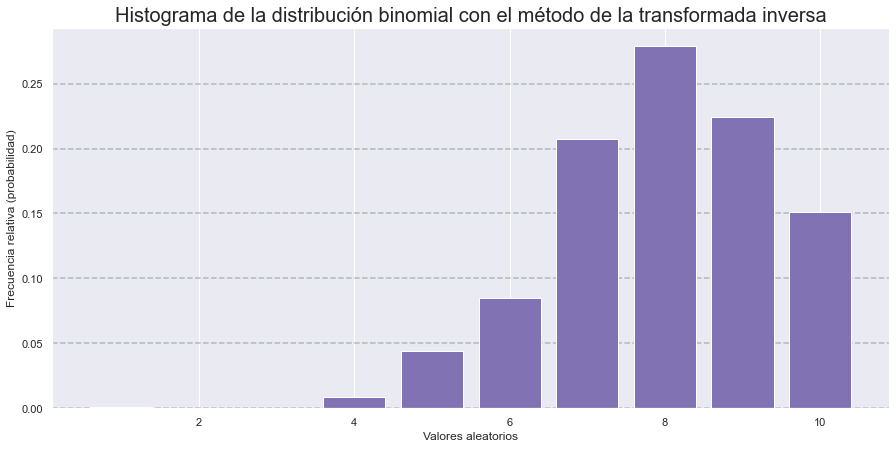

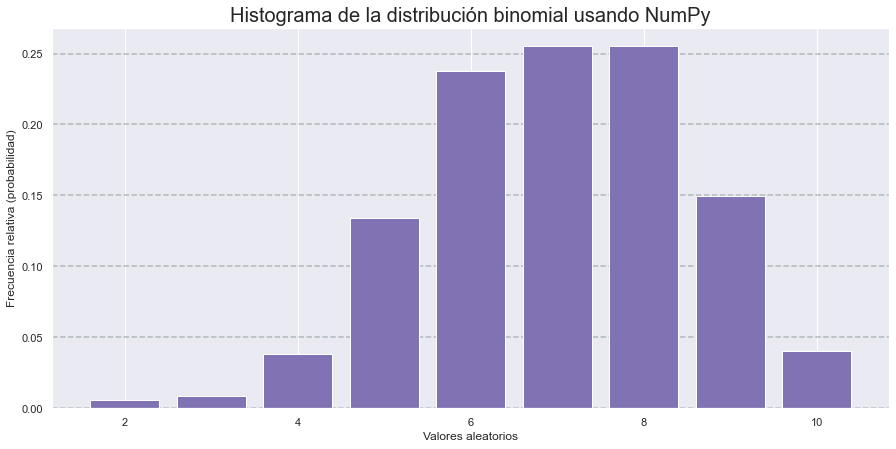

In [2]:
np.random.seed(123) # semilla
def prob_acum_dist_bim(n: "valor 'n' de la distribución binomial" , p: "valor 'p' de la distribución binomial"):
    """Esta función regresa un vector de la probabilidad acumulada 'F(x)' con base en los valores 'n' y 'p' de la distribución
    binomial"""
    probabilidades = np.zeros(n) # vector de ceros tamaño n
    probabilidades[0] = (1 - p)**n # llenar el primer elemento
    def llenar_vector(i):
        nonlocal probabilidades
        probabilidades[i + 1] = ((p / (1 - p)) * ((n - i) / (i + 1))) * probabilidades[i]
    [llenar_vector(i) for i in range(n - 1)] # llenar los demás elementos
    return np.cumsum(probabilidades)
def generar_dist_discreta(p_acum: "vector de la probabilidad acumulada de la distribución a generar", 
                          N: "cantidad de números aleatorios a generar"):
    """Esta función regresa el vector con la frecuencia de cada uno de los números aleatorios generados"""
    x = np.random.rand(N) # generar N valores aleatorios uniformemente distribuidos entre 0 y 1
    y = pd.Series([sum([1 for p in p_acum if p < xi]) for xi in x]) # calcular la frecuencia de dichos de valores
    return y
def graficar_hist_discreto(distribucion: "distribución a graficar el histograma", title: "título del histograma"):
    """Esta función plotea el histograma de una variable discreta dada una distribución (un vector con la frecuencia de cada
    uno de los valores aleatorios generados), y un título de la gráfica"""
    plt.figure(figsize = (15, 7))
    y, x = np.histogram(distribucion, bins = len(set(distribucion)), density = True) 
    plt.bar(list(set(distribucion)), y, color = "m")
    plt.xlabel("Valores aleatorios", fontsize = 12)
    plt.ylabel("Frecuencia relativa (probabilidad)", fontsize = 12)
    plt.title(title, fontsize = 20)
    plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
    plt.show()
n, p, N = 10, 0.7, 1000 #n, p y N dados en el problema
p_acum = prob_acum_dist_bim(n, p) # calcular la probabilidad acumulada con los n y p dados

# Usando el método de la transformada inversa
d_bin_transformada = generar_dist_discreta(p_acum, N)
graficar_hist_discreto(d_bin_transformada, "Histograma de la distribución binomial con el método de la transformada inversa")

# Usando numpy
d_bin_np = np.random.binomial(n, p, N)
graficar_hist_discreto(d_bin_np, "Histograma de la distribución binomial usando NumPy")